## Extras: load netCDF files directly from HTTP

In [1]:
from netCDF4 import Dataset

try:
    url = (
        "https://noaa-goes16.s3.amazonaws.com/"
        "ABI-L2-CMIPC/2019/027/00/"
        "OR_ABI-L2-CMIPC-M3C01_G16_"
        "s20190270002156_e20190270004529_c20190270004598.nc"
    )
    nc = Dataset(url)
except OSError as e:
    print(e)

[Errno -90] NetCDF: file not found: b'https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPC/2019/027/00/OR_ABI-L2-CMIPC-M3C01_G16_s20190270002156_e20190270004529_c20190270004598.nc'


In [2]:
with Dataset(f"{url}#mode=bytes") as nc:
    print(nc.summary)

Single reflective band Cloud and Moisture Imagery Products are digital maps of clouds, moisture, and atmospheric windows at visible and near-IR bands.


![](https://media.giphy.com/media/12NUbkX6p4xOO4/giphy.gif)

## Extras: custom APIs like CSD

For more info see [https://cds.climate.copernicus.eu/api-how-to](https://cds.climate.copernicus.eu/api-how-to)

In [3]:
import cdsapi

c = cdsapi.Client()

name = "reanalysis-era5-pressure-levels"
request = {
    "year": "2008",
    "month": "01",
    "day": "01",
    "time": "12:00",
    "variable": "temperature",
    "pressure_level": "1000",
    "product_type": "reanalysis",
    "format": "netcdf",
}

r = c.retrieve(name, request, None)

2020-08-08 15:29:36,469 INFO Welcome to the CDS
2020-08-08 15:29:36,471 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2020-08-08 15:29:37,687 INFO Request is completed


In [4]:
r.location

'http://136.156.133.36/cache-compute-0010/cache/data1/adaptor.mars.internal-1596825425.6997619-24611-9-aabbaba2-9815-427a-841b-f8aeb8218a73.nc'

In [5]:
import xarray as xr

ds = xr.open_dataset(f"{r.location}#mode=bytes")
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2008-01-01T12:00:00
Data variables:
    t          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-08-07 18:37:06 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

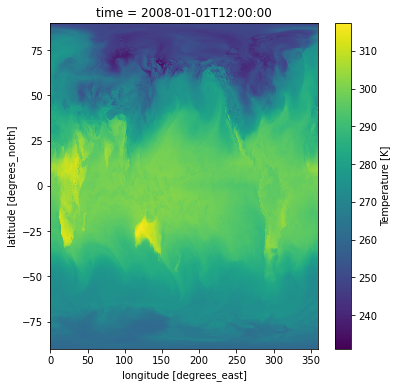

In [6]:
%matplotlib inline


temp = ds["t"].squeeze()
temp.plot(figsize=(6, 6));